In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Greenland = pd.read_excel(filepath, sheet_name='Greenland-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Greenland)
fp.date_time(Greenland)

,Extent,Date
0,1076123.146,1979-01-01
1,1099248.063,1979-02-01
2,1036964.901,1979-03-01
3,958927.937,1979-04-01
4,823812.694,1979-05-01
...,...,...
533,721350.515,2023-06-01
534,459033.164,2023-07-01
535,282045.909,2023-08-01
536,270397.608,2023-09-01


In [5]:
scaler = MinMaxScaler()
Greenland['Extent'] = scaler.fit_transform(Greenland['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Greenland['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((523, 12, 1), (523,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Greenland_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
40/53 [=====================>........] - ETA: 0s - loss: 0.3002 - root_mean_squared_error: 0.5479

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 6s 78ms/step - loss: 0.2931 - root_mean_squared_error: 0.5414 - val_loss: 0.1571 - val_root_mean_squared_error: 0.3964
Epoch 2/50
41/53 [======================>.......] - ETA: 0s - loss: 0.2498 - root_mean_squared_error: 0.4998

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.2484 - root_mean_squared_error: 0.4984 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3541
Epoch 3/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2118 - root_mean_squared_error: 0.4602

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.2073 - root_mean_squared_error: 0.4553 - val_loss: 0.0989 - val_root_mean_squared_error: 0.3144
Epoch 4/50
42/53 [======================>.......] - ETA: 0s - loss: 0.1775 - root_mean_squared_error: 0.4213

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.1696 - root_mean_squared_error: 0.4119 - val_loss: 0.0772 - val_root_mean_squared_error: 0.2779
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.1380 - root_mean_squared_error: 0.3715

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.1380 - root_mean_squared_error: 0.3715 - val_loss: 0.0589 - val_root_mean_squared_error: 0.2428
Epoch 6/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1104 - root_mean_squared_error: 0.3322

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.1098 - root_mean_squared_error: 0.3313 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2060
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0880 - root_mean_squared_error: 0.2967

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0871 - root_mean_squared_error: 0.2952 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1818
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0675 - root_mean_squared_error: 0.2597

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0670 - root_mean_squared_error: 0.2588 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1658
Epoch 9/50
38/53 [====================>.........] - ETA: 0s - loss: 0.0549 - root_mean_squared_error: 0.2342

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0537 - root_mean_squared_error: 0.2318 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1404
Epoch 10/50
38/53 [====================>.........] - ETA: 0s - loss: 0.0435 - root_mean_squared_error: 0.2087

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0425 - root_mean_squared_error: 0.2061 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1304
Epoch 11/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1834

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0317 - root_mean_squared_error: 0.1780 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1230
Epoch 12/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0242 - root_mean_squared_error: 0.1554 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1406

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0198 - root_mean_squared_error: 0.1405 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 14/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1303

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 15/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 16/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1212

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1051
Epoch 17/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.1263

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995
Epoch 18/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1207
Epoch 19/50
53/53 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1085

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 21/50
41/53 [======================>.......] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1018

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 22/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 23/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 24/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0108 - root_mean_squared_error: 0.1041 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1034
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1170
Epoch 26/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 0.0127 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 28/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1446
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 30/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 31/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1055

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0959
Epoch 32/50
53/53 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1075

INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


INFO:tensorflow:Assets written to: Greenland_model_LT4\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0115 - root_mean_squared_error: 0.1075 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 33/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 34/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1366
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1125
Epoch 36/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1012
Epoch 37/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - val_loss: 0.0134 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.2586243669191997 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

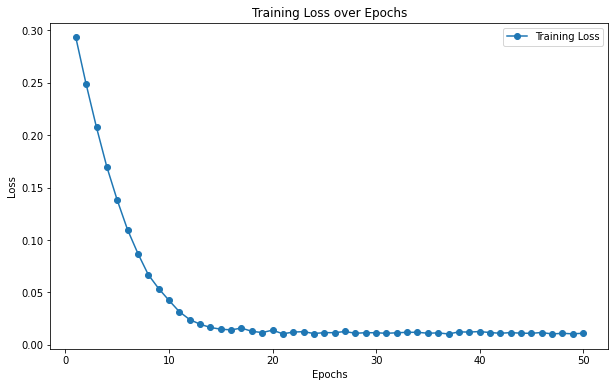

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

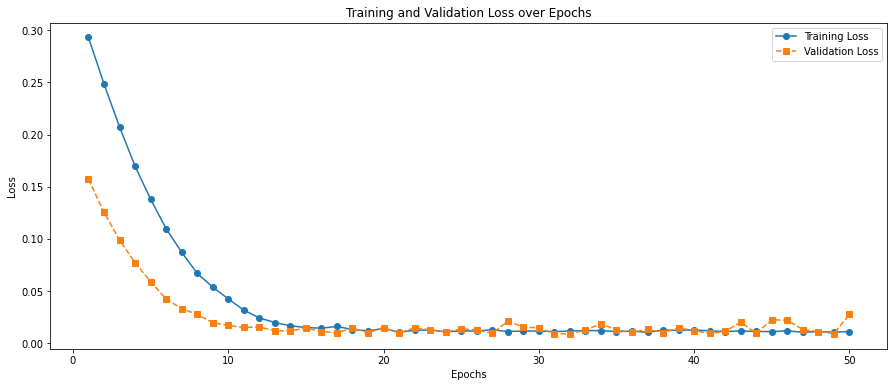

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Greenland_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08738347434941407
MAE : 0.06963576758963613


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,248850.062500,283162.646
1,187792.296875,212475.431
2,312588.031250,386546.857
3,396290.125000,547183.986
4,523723.906250,584596.262
5,574958.812500,584830.109
6,638168.562500,641562.292
7,686634.437500,734946.437
8,691057.062500,777596.225
9,614858.125000,687087.673


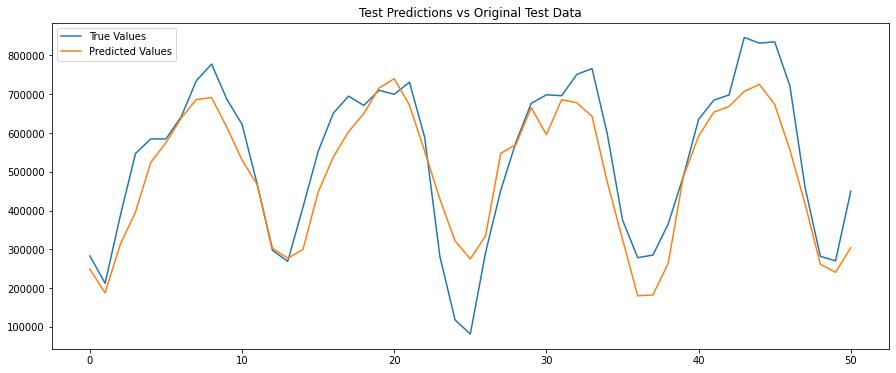

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

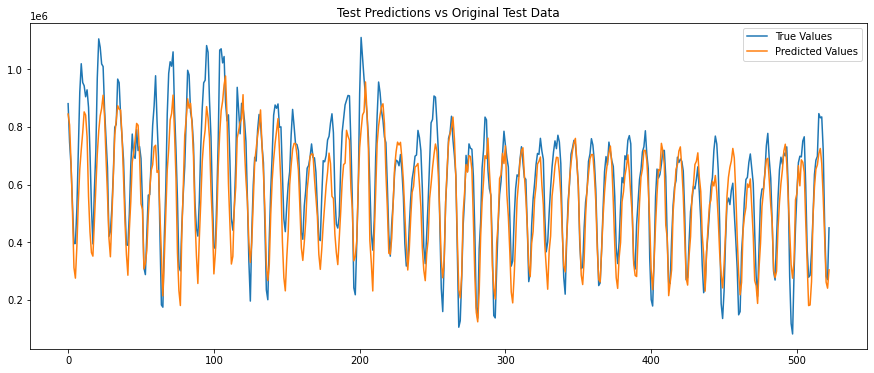

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()